In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import torch.nn.functional as F
import numpy as np

# torch.manual_seed(1)

EPOCH = 2
LR = 0.001
DOWNLOAD_MNIST = True

train_data = torchvision.datasets.MNIST(root='./mnist/', train=True, transform=torchvision.transforms.ToTensor(),
                                        download=DOWNLOAD_MNIST, )
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)

print(train_data.train_data.shape)

train_x = torch.unsqueeze(train_data.train_data, dim=1).type(torch.FloatTensor) / 255.
train_y = train_data.train_labels
print(train_x.shape)

test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000] / 255.  # Tensor on GPU
test_y = test_data.test_labels[:2000]

torch.Size([60000, 28, 28])
torch.Size([60000, 1, 28, 28])


/Users/gaohuachen/anaconda3/envs/mps/lib/python3.8/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/Users/gaohuachen/anaconda3/envs/mps/lib/python3.8/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/Users/gaohuachen/anaconda3/envs/mps/lib/python3.8/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/Users/gaohuachen/anaconda3/envs/mps/lib/python3.8/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [2]:
train_y.shape

torch.Size([60000])

In [3]:
print(train_y[:10])

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])


In [4]:
test_x.shape

torch.Size([2000, 1, 28, 28])

In [5]:
test_y.shape

torch.Size([2000])

In [6]:
print(test_y[:10])

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])


In [8]:
import matplotlib.pyplot as plt

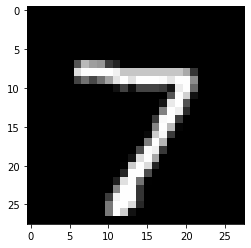

In [10]:
plt.imshow(test_x[0,0,:,:].numpy(), 'gray')

In [ ]:
test_y[:10]

In [ ]:
loss_func = nn.CrossEntropyLoss()

In [ ]:
aa = torch.randn(32, 10)
bb = test_y[:32]
cc = loss_func(aa,bb)
print(cc)

In [11]:
import torch.nn.functional as F

In [37]:
target = torch.tensor([0,7,9]) # 标签 这里还有一个torch.tensor与torch.Tensor的知识点https://blog.csdn.net/weixin_40607008/article/details/107348254
one_hot = F.one_hot(target).float() 
print(one_hot)

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])


In [14]:
target = torch.randn(3, 5).softmax(dim=1)
print(target)

tensor([[0.2244, 0.0666, 0.1763, 0.2597, 0.2731],
        [0.0723, 0.3102, 0.2091, 0.0645, 0.3440],
        [0.2235, 0.5136, 0.0371, 0.0882, 0.1376]])


In [16]:
target = torch.randn(3, 5)
print(target)

tensor([[ 0.1092,  0.5171,  0.8749,  0.3472, -0.3348],
        [-0.1448,  1.6545,  0.3189,  0.3437, -1.4043],
        [-0.4056, -0.4356,  0.2566, -0.0514, -0.9544]])


In [17]:
print(target.softmax(dim=1))

tensor([[0.1523, 0.2291, 0.3276, 0.1933, 0.0977],
        [0.0948, 0.5731, 0.1507, 0.1545, 0.0269],
        [0.1691, 0.1641, 0.3280, 0.2410, 0.0977]])


In [18]:
print(target.softmax(dim=0))

tensor([[0.4214, 0.2220, 0.4734, 0.3748, 0.5316],
        [0.3268, 0.6924, 0.2715, 0.3735, 0.1824],
        [0.2518, 0.0856, 0.2551, 0.2516, 0.2860]])


In [39]:
import pdb

In [40]:
class FC(nn.Module):
    def __init__(self):
        super(FC, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)
#         self.fc3 = nn.Linear(10, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
#         x = F.relu(x)
#         x = self.fc3(x)

        output = x
        return output


fc = FC()

optimizer = torch.optim.Adam(fc.parameters(), lr=LR)
# loss_func = nn.MSELoss()
loss_func = nn.CrossEntropyLoss()

data_size = 20000
batch_size = 50

for epoch in range(EPOCH):
    random_indx = np.random.permutation(data_size)
    for batch_i in range(data_size // batch_size):
        indx = random_indx[batch_i * batch_size:(batch_i + 1) * batch_size]

        b_x = train_x[indx, :]
        b_y = train_y[indx]
#         print(b_x.shape)
#         print(b_y.shape)
#         pdb.set_trace()

        output = fc(b_x)
    
        loss = loss_func(output, b_y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch_i % 50 == 0:
            test_output = fc(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            # pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = torch.sum(pred_y == test_y).type(torch.FloatTensor) / test_y.size(0)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.cpu().numpy(), '| test accuracy: %.3f' % accuracy)

test_output = fc(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.squeeze()  # move the computation in GPU

print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

> <ipython-input-40-30801940ac41>(40)<module>()
     38         pdb.set_trace()
     39 
---> 40         output = fc(b_x)
     41 
     42         loss = loss_func(output, b_y)

ipdb> l
     35         b_y = train_y[indx]
     36 #         print(b_x.shape)
     37 #         print(b_y.shape)
     38         pdb.set_trace()
     39 
---> 40         output = fc(b_x)
     41 
     42         loss = loss_func(output, b_y)
     43 
     44         loss.backward()
     45         optimizer.step()

ipdb> b_x.shape
torch.Size([50, 1, 28, 28])
ipdb> b_y.shape
torch.Size([50])
ipdb> n
> <ipython-input-40-30801940ac41>(42)<module>()
     40         output = fc(b_x)
     41 
---> 42         loss = loss_func(output, b_y)
     43 
     44         loss.backward()

ipdb> output.shape
torch.Size([50, 10])
ipdb> n
> <ipython-input-40-30801940ac41>(44)<module>()
     42         loss = loss_func(output, b_y)
     43 
---> 44         loss.backward()
     45         optimizer.step()
     46         optimizer

BdbQuit: 

In [22]:
test_output = fc(test_x[:9])

In [23]:
test_output.shape

torch.Size([9, 10])

In [31]:
test_output[1,:]

tensor([  0.6090,   1.7516,  11.0509,   3.8131,  -7.3405,   4.1543,   4.1952,
        -11.7032,   2.4016, -12.1739], grad_fn=<SliceBackward>)

In [25]:
test_y[:9]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5])

In [ ]:
torch.max(test_output, 1)[1].data.squeeze()

In [34]:
 print(torch.sum(torch.max(test_output, 1)[1]==test_y[:9]))
    

tensor(8)


In [35]:
torch.max(test_output, 1)[1]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 6])

In [33]:
test_y[:9]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5])

In [2]:
test_output

NameError: name 'test_output' is not defined

In [ ]:
test_output = fc(test_x[:1])
pred_y = torch.max(test_output, 1)[1].data.squeeze()  # move the computation in GPU

print(pred_y, 'prediction number')
print(test_y[:1], 'real number')

In [ ]:
test_output

In [ ]:
test_x[:1].shape

In [ ]:
plt.imshow(test_x[:1].numpy().squeeze(), 'gray')